In this project, we analyze airline delays from 2019 using PySpark to handle a large dataset with over a million rows. The dataset includes airline schedules, delay flags, airport locations, aircraft capacity, and local weather conditions. Our goal is to uncover patterns in delays and identify the key contributing factors using big data analysis and visualization


In [1]:
from pyspark.sql import SparkSession #importing SparkSession Class
from pyspark.sql.functions import col, isnan, when, count,avg
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
spark= SparkSession.builder.appName('delayed_flights').getOrCreate()      #this line creates or retrieve a spark session instance,'.appName' sets the nake of the spark application and lastly getOrCreate() checks if SparkSesssion is running if not crate one.

In [3]:
df= spark.read.csv("full_data_flightdelay.csv",header=True,inferSchema=True) # used to read csv files and perform data analysis

In [4]:
df.count() #no. of rows in dataset

84712

In [5]:
df.columns #columns names

['MONTH',
 'DAY_OF_WEEK',
 'DEP_DEL15',
 'DEP_TIME_BLK',
 'DISTANCE_GROUP',
 'SEGMENT_NUMBER',
 'CONCURRENT_FLIGHTS',
 'NUMBER_OF_SEATS',
 'CARRIER_NAME',
 'AIRPORT_FLIGHTS_MONTH',
 'AIRLINE_FLIGHTS_MONTH',
 'AIRLINE_AIRPORT_FLIGHTS_MONTH',
 'AVG_MONTHLY_PASS_AIRPORT',
 'AVG_MONTHLY_PASS_AIRLINE',
 'FLT_ATTENDANTS_PER_PASS',
 'GROUND_SERV_PER_PASS',
 'PLANE_AGE',
 'DEPARTING_AIRPORT',
 'LATITUDE',
 'LONGITUDE',
 'PREVIOUS_AIRPORT',
 'PRCP',
 'SNOW',
 'SNWD',
 'TMAX',
 'AWND']

In [6]:
df.show(10)

+-----+-----------+---------+------------+--------------+--------------+------------------+---------------+--------------------+---------------------+---------------------+-----------------------------+------------------------+------------------------+-----------------------+--------------------+---------+--------------------+--------+---------+----------------+----+----+----+----+----+
|MONTH|DAY_OF_WEEK|DEP_DEL15|DEP_TIME_BLK|DISTANCE_GROUP|SEGMENT_NUMBER|CONCURRENT_FLIGHTS|NUMBER_OF_SEATS|        CARRIER_NAME|AIRPORT_FLIGHTS_MONTH|AIRLINE_FLIGHTS_MONTH|AIRLINE_AIRPORT_FLIGHTS_MONTH|AVG_MONTHLY_PASS_AIRPORT|AVG_MONTHLY_PASS_AIRLINE|FLT_ATTENDANTS_PER_PASS|GROUND_SERV_PER_PASS|PLANE_AGE|   DEPARTING_AIRPORT|LATITUDE|LONGITUDE|PREVIOUS_AIRPORT|PRCP|SNOW|SNWD|TMAX|AWND|
+-----+-----------+---------+------------+--------------+--------------+------------------+---------------+--------------------+---------------------+---------------------+-----------------------------+------------------

In [7]:
df.printSchema()

root
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- DEP_DEL15: integer (nullable = true)
 |-- DEP_TIME_BLK: string (nullable = true)
 |-- DISTANCE_GROUP: integer (nullable = true)
 |-- SEGMENT_NUMBER: integer (nullable = true)
 |-- CONCURRENT_FLIGHTS: integer (nullable = true)
 |-- NUMBER_OF_SEATS: integer (nullable = true)
 |-- CARRIER_NAME: string (nullable = true)
 |-- AIRPORT_FLIGHTS_MONTH: integer (nullable = true)
 |-- AIRLINE_FLIGHTS_MONTH: integer (nullable = true)
 |-- AIRLINE_AIRPORT_FLIGHTS_MONTH: integer (nullable = true)
 |-- AVG_MONTHLY_PASS_AIRPORT: integer (nullable = true)
 |-- AVG_MONTHLY_PASS_AIRLINE: integer (nullable = true)
 |-- FLT_ATTENDANTS_PER_PASS: double (nullable = true)
 |-- GROUND_SERV_PER_PASS: double (nullable = true)
 |-- PLANE_AGE: integer (nullable = true)
 |-- DEPARTING_AIRPORT: string (nullable = true)
 |-- LATITUDE: double (nullable = true)
 |-- LONGITUDE: double (nullable = true)
 |-- PREVIOUS_AIRPORT: stri

In [8]:
df.describe().show()

+-------+-----+------------------+------------------+------------+-----------------+------------------+------------------+-----------------+--------------------+---------------------+---------------------+-----------------------------+------------------------+------------------------+-----------------------+--------------------+-----------------+--------------------+-----------------+------------------+--------------------+-------------------+-------------------+-------------------+------------------+-----------------+
|summary|MONTH|       DAY_OF_WEEK|         DEP_DEL15|DEP_TIME_BLK|   DISTANCE_GROUP|    SEGMENT_NUMBER|CONCURRENT_FLIGHTS|  NUMBER_OF_SEATS|        CARRIER_NAME|AIRPORT_FLIGHTS_MONTH|AIRLINE_FLIGHTS_MONTH|AIRLINE_AIRPORT_FLIGHTS_MONTH|AVG_MONTHLY_PASS_AIRPORT|AVG_MONTHLY_PASS_AIRLINE|FLT_ATTENDANTS_PER_PASS|GROUND_SERV_PER_PASS|        PLANE_AGE|   DEPARTING_AIRPORT|         LATITUDE|         LONGITUDE|    PREVIOUS_AIRPORT|               PRCP|               SNOW|        

In [9]:
from pyspark.sql.functions import col, isnan, when, count

df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show() #used to find the null valuesin the data set


+-----+-----------+---------+------------+--------------+--------------+------------------+---------------+------------+---------------------+---------------------+-----------------------------+------------------------+------------------------+-----------------------+--------------------+---------+-----------------+--------+---------+----------------+----+----+----+----+----+
|MONTH|DAY_OF_WEEK|DEP_DEL15|DEP_TIME_BLK|DISTANCE_GROUP|SEGMENT_NUMBER|CONCURRENT_FLIGHTS|NUMBER_OF_SEATS|CARRIER_NAME|AIRPORT_FLIGHTS_MONTH|AIRLINE_FLIGHTS_MONTH|AIRLINE_AIRPORT_FLIGHTS_MONTH|AVG_MONTHLY_PASS_AIRPORT|AVG_MONTHLY_PASS_AIRLINE|FLT_ATTENDANTS_PER_PASS|GROUND_SERV_PER_PASS|PLANE_AGE|DEPARTING_AIRPORT|LATITUDE|LONGITUDE|PREVIOUS_AIRPORT|PRCP|SNOW|SNWD|TMAX|AWND|
+-----+-----------+---------+------------+--------------+--------------+------------------+---------------+------------+---------------------+---------------------+-----------------------------+------------------------+-----------------------

In [10]:
df.fillna(0)  #used to fill the empty values

DataFrame[MONTH: int, DAY_OF_WEEK: int, DEP_DEL15: int, DEP_TIME_BLK: string, DISTANCE_GROUP: int, SEGMENT_NUMBER: int, CONCURRENT_FLIGHTS: int, NUMBER_OF_SEATS: int, CARRIER_NAME: string, AIRPORT_FLIGHTS_MONTH: int, AIRLINE_FLIGHTS_MONTH: int, AIRLINE_AIRPORT_FLIGHTS_MONTH: int, AVG_MONTHLY_PASS_AIRPORT: int, AVG_MONTHLY_PASS_AIRLINE: int, FLT_ATTENDANTS_PER_PASS: double, GROUND_SERV_PER_PASS: double, PLANE_AGE: int, DEPARTING_AIRPORT: string, LATITUDE: double, LONGITUDE: double, PREVIOUS_AIRPORT: string, PRCP: double, SNOW: double, SNWD: double, TMAX: double, AWND: double]

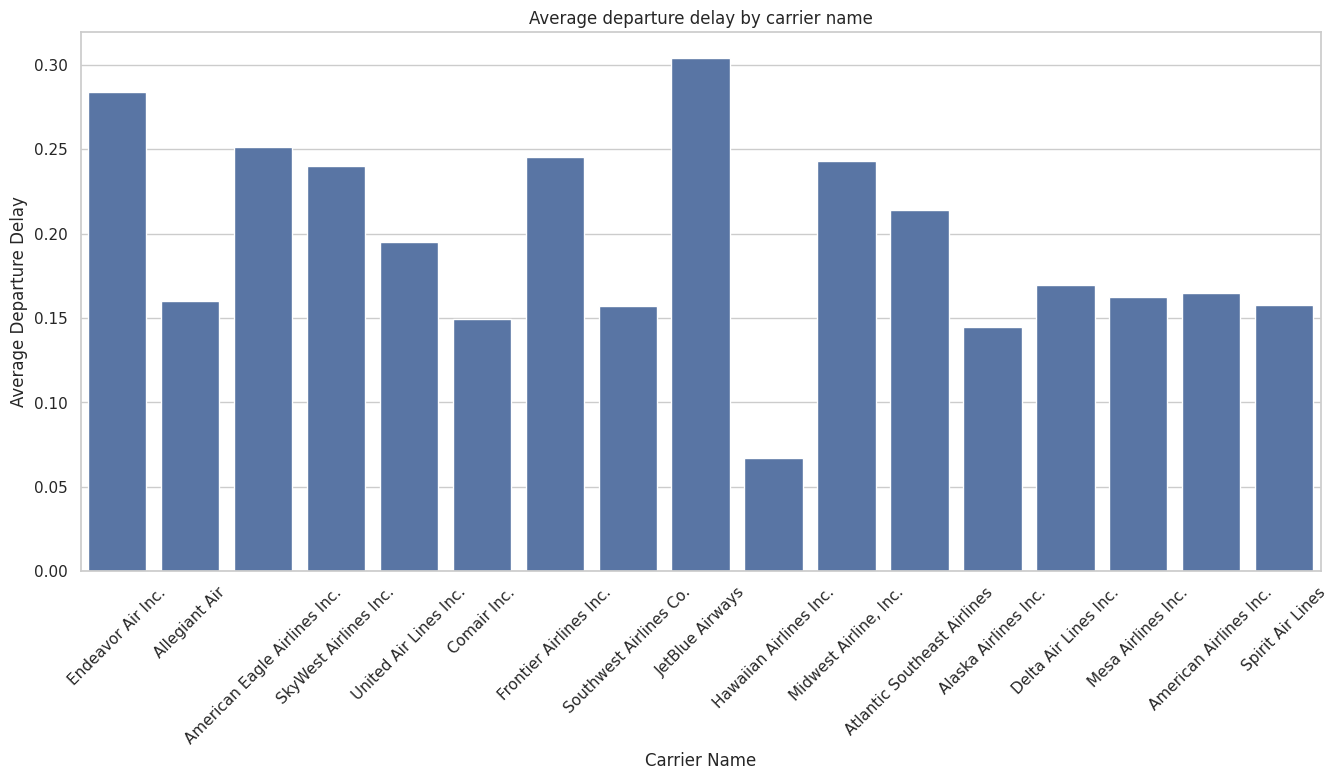

In [11]:
result=df.groupby("CARRIER_NAME").agg({"DEP_DEL15":"avg"}).toPandas()
sns.set(style="whitegrid")
plt.figure(figsize=(16,7))
sns.barplot(x="CARRIER_NAME",y="avg(DEP_DEL15)",data=result)
plt.xlabel("Carrier Name")
plt.ylabel("Average Departure Delay")
plt.title("Average departure delay by carrier name")
plt.xticks(rotation=45)
plt.show()

Some airlines experience consistently higher delays than others.

Airlines like Atlantic Souteast Airlines had the highest average delay.

Others like Hawaiian Airlines Inc. maintained punctuality.

Operational efficiency varies across airlines. This could be due to differences in fleet size, crew management, or route complexity

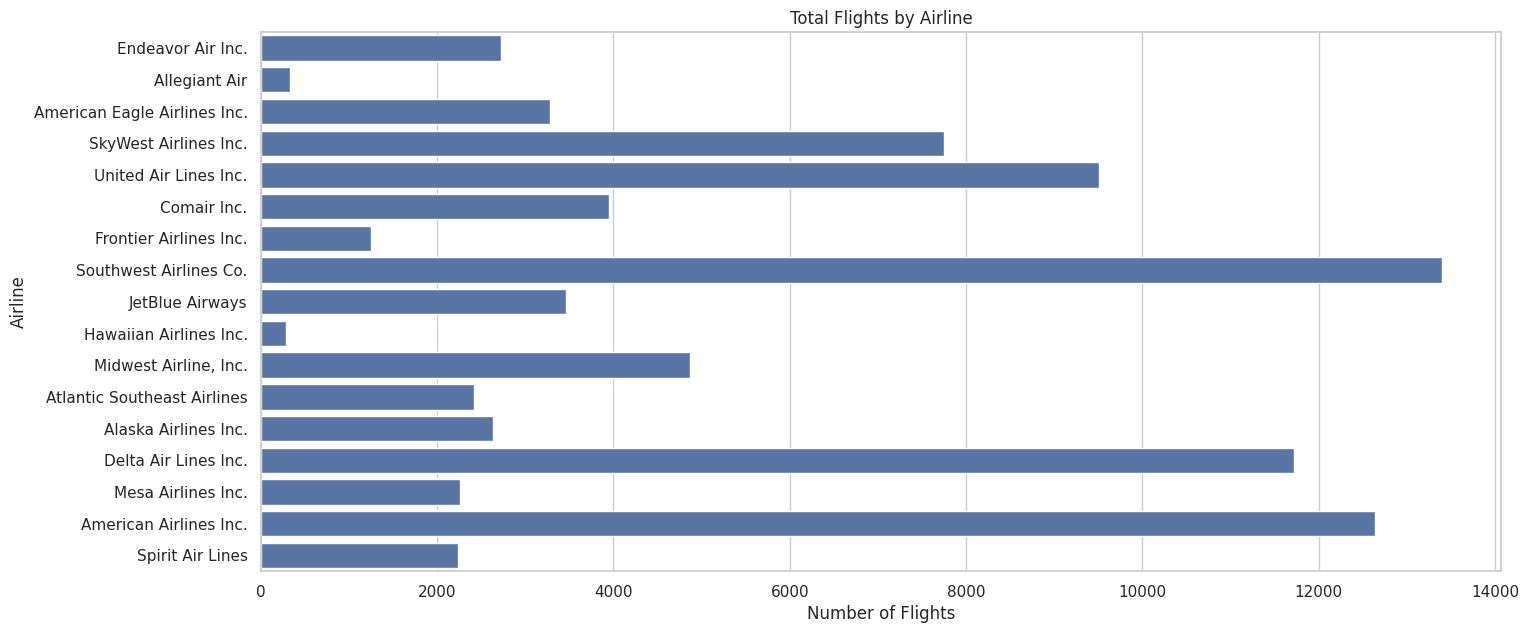

In [12]:
flights = df.groupBy("CARRIER_NAME").count().toPandas()
sns.set(style="whitegrid")
plt.figure(figsize=(16,7))
sns.barplot(y="CARRIER_NAME", x="count", data=flights)
plt.title("Total Flights by Airline")
plt.xlabel("Number of Flights")
plt.ylabel("Airline")
plt.show()


Southwest Airlines, American Airlines, and Delta Air Lines have the highest number of flights, showing their dominance in the U.S. domestic market.
Airlines with fewer flights likely operate in niche markets, focus on regional routes, or have smaller fleets.



/tmp/ipython-input-13-625088421.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="DEPARTING_AIRPORT", x="avg(DEP_DEL15)", data=all_airports, palette="viridis")


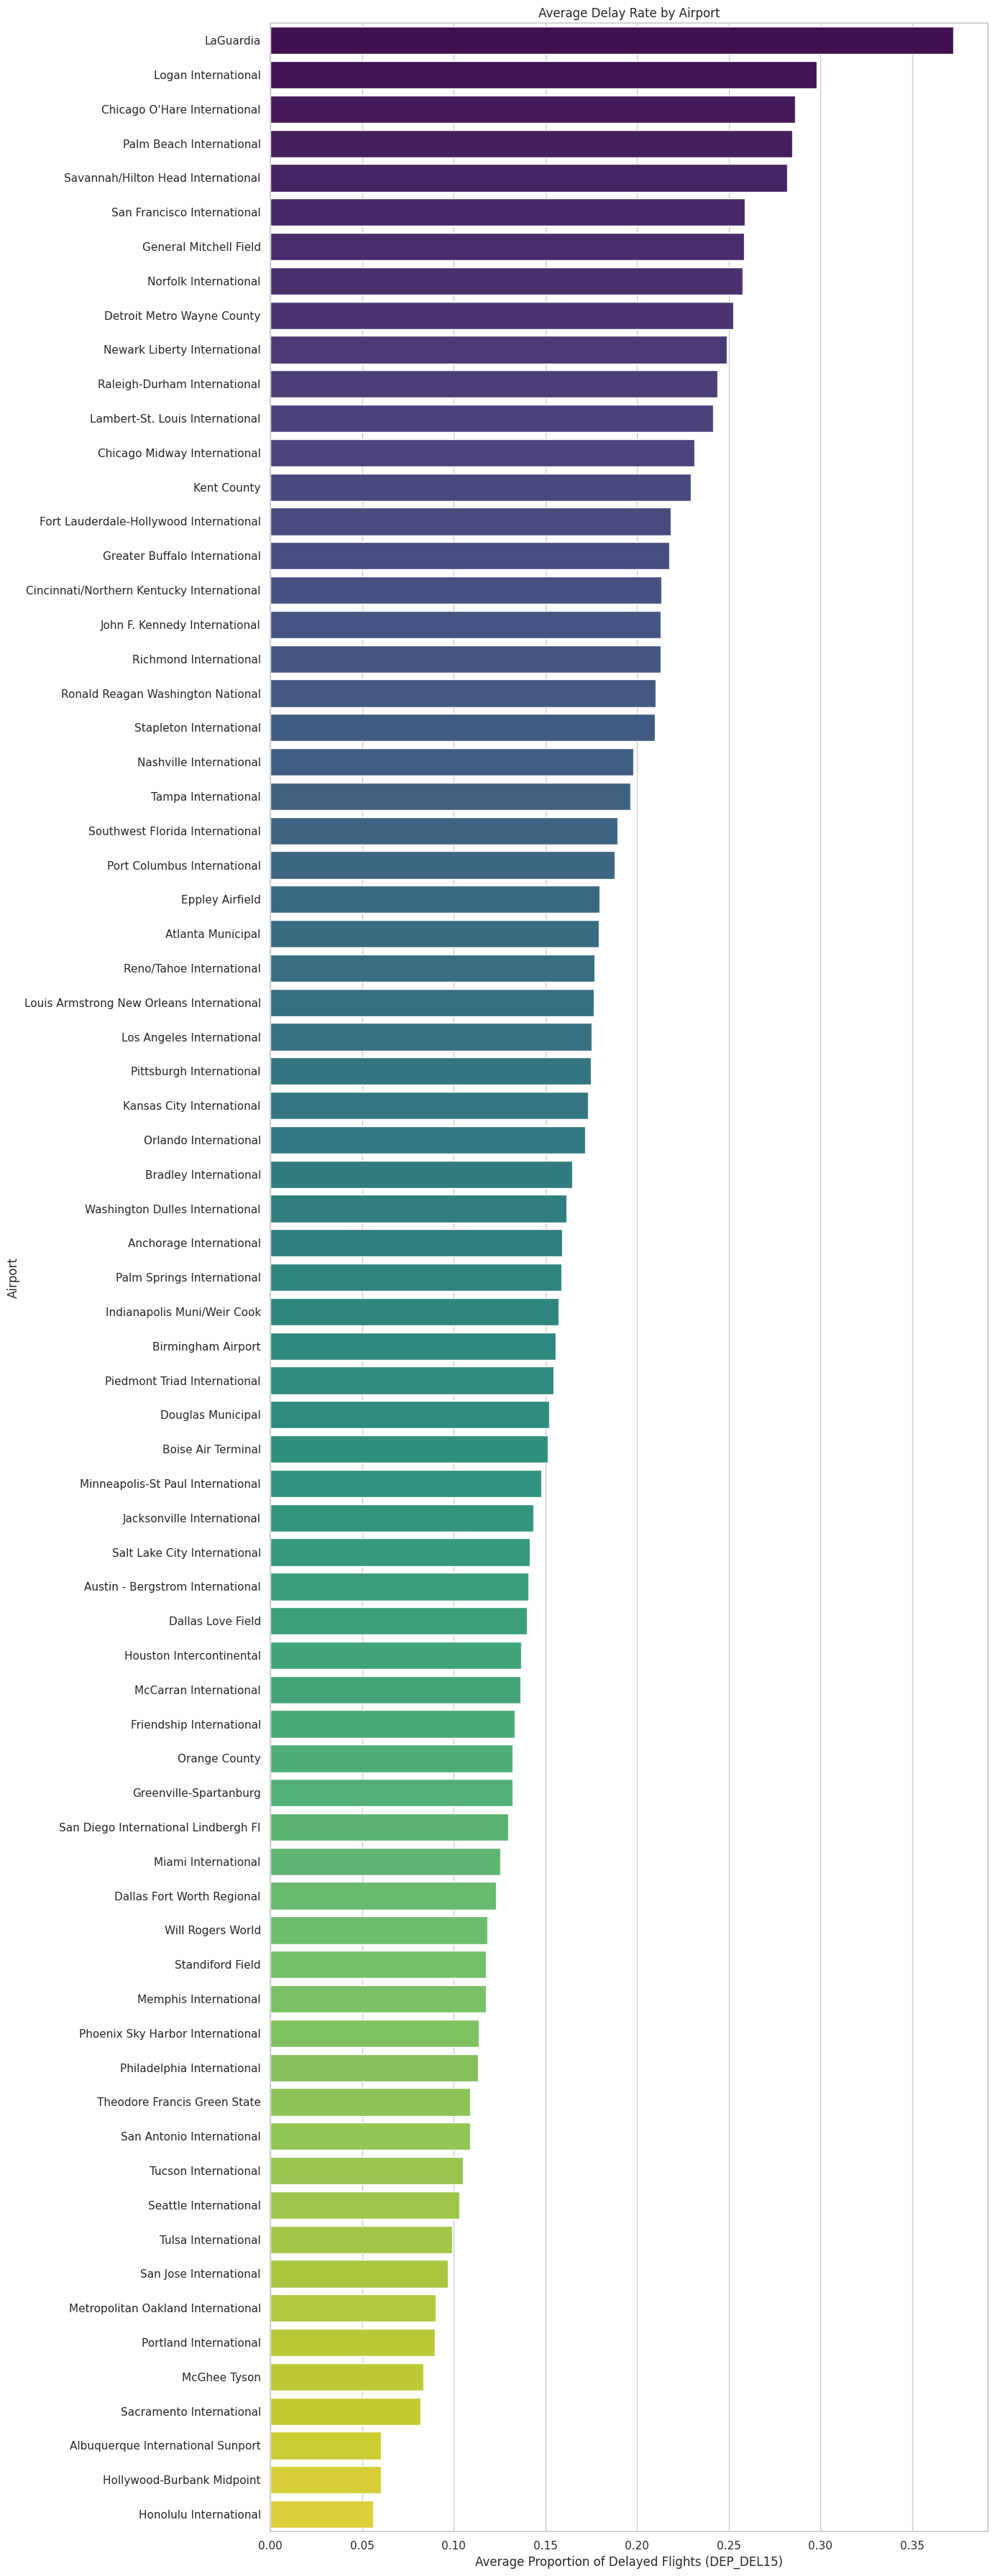

In [13]:
all_airports = df.groupBy("DEPARTING_AIRPORT") \
    .agg({"DEP_DEL15": "avg"}) \
    .orderBy("avg(DEP_DEL15)", ascending=False) \
    .toPandas()

plt.figure(figsize=(14, max(6, len(all_airports) // 2)))  # Auto-adjust height
sns.barplot(y="DEPARTING_AIRPORT", x="avg(DEP_DEL15)", data=all_airports, palette="viridis")
plt.title("Average Delay Rate by Airport")
plt.xlabel("Average Proportion of Delayed Flights (DEP_DEL15)")
plt.ylabel("Airport")
plt.tight_layout()
plt.show()


LaGuardia, Chicago O'Hare, and General Mitchell Field have the highest delay rates, suggesting congestion or operational challenges.
In contrast, airports like Tucson, Portland, and Sacramento show very low delay proportions, indicating smoother operations or less traffic.

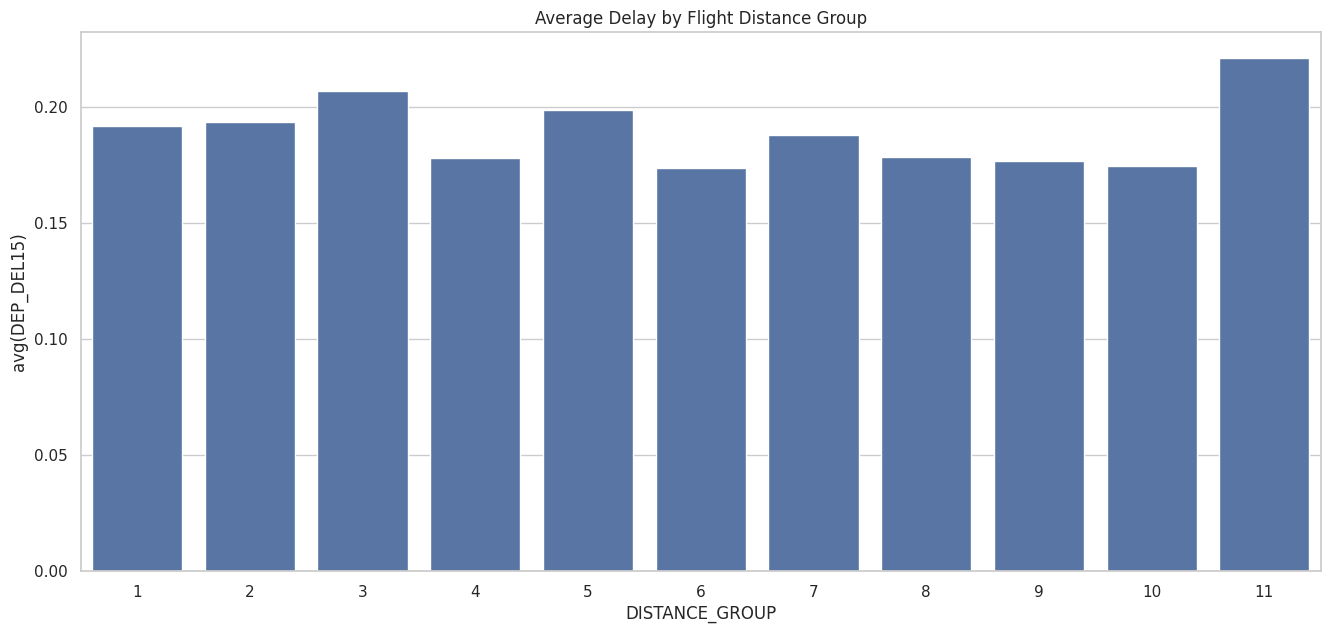

In [14]:
distance = df.groupBy("DISTANCE_GROUP").agg({"DEP_DEL15": "avg"}).orderBy("DISTANCE_GROUP").toPandas()
sns.set(style="whitegrid")
plt.figure(figsize=(16,7))
sns.barplot(x="DISTANCE_GROUP", y="avg(DEP_DEL15)", data=distance)
plt.title("Average Delay by Flight Distance Group")
plt.show()

Short to mid-distance flights (lower distance groups) tend to experience higher average delays compared to longer flights.
This could be due to tighter scheduling, higher frequency, and airport congestion affecting shorter routes more significantly.

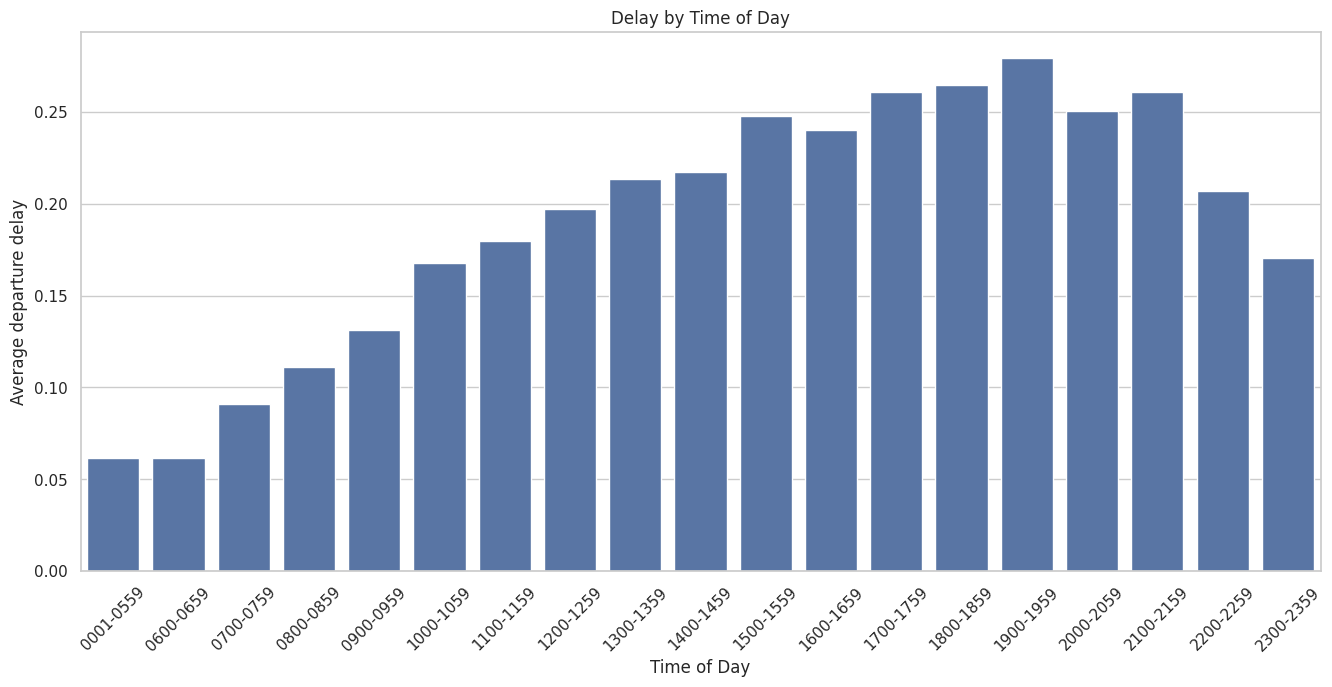

In [15]:
time_block = df.groupBy("DEP_TIME_BLK").agg({"DEP_DEL15": "avg"}).orderBy("DEP_TIME_BLK").toPandas()
sns.set(style="whitegrid")
plt.figure(figsize=(16,7))
sns.barplot(x="DEP_TIME_BLK", y="avg(DEP_DEL15)", data=time_block)
plt.xlabel("Time of Day")
plt.ylabel("Average departure delay")
plt.xticks(rotation=45)
plt.title("Delay by Time of Day")
plt.show()


 Delays by Time of Day
 Late evening flights (e.g., 6 PM–10 PM) had more delays than early morning ones.

 As the day progresses, flight schedules accumulate delays. Early flights usually have better on-time performance.



+---------------+-----+
|    PRCP_BUCKET|count|
+---------------+-----+
|        No Rain|57875|
|     Light Rain| 7170|
|Very Light Rain| 5552|
|     Heavy Rain| 5222|
|Very Heavy Rain| 4760|
|  Moderate Rain| 4133|
+---------------+-----+



/tmp/ipython-input-16-1375351275.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="PRCP_BUCKET", y="avg(DEP_DEL15)", data=prcp_data, palette="Blues")


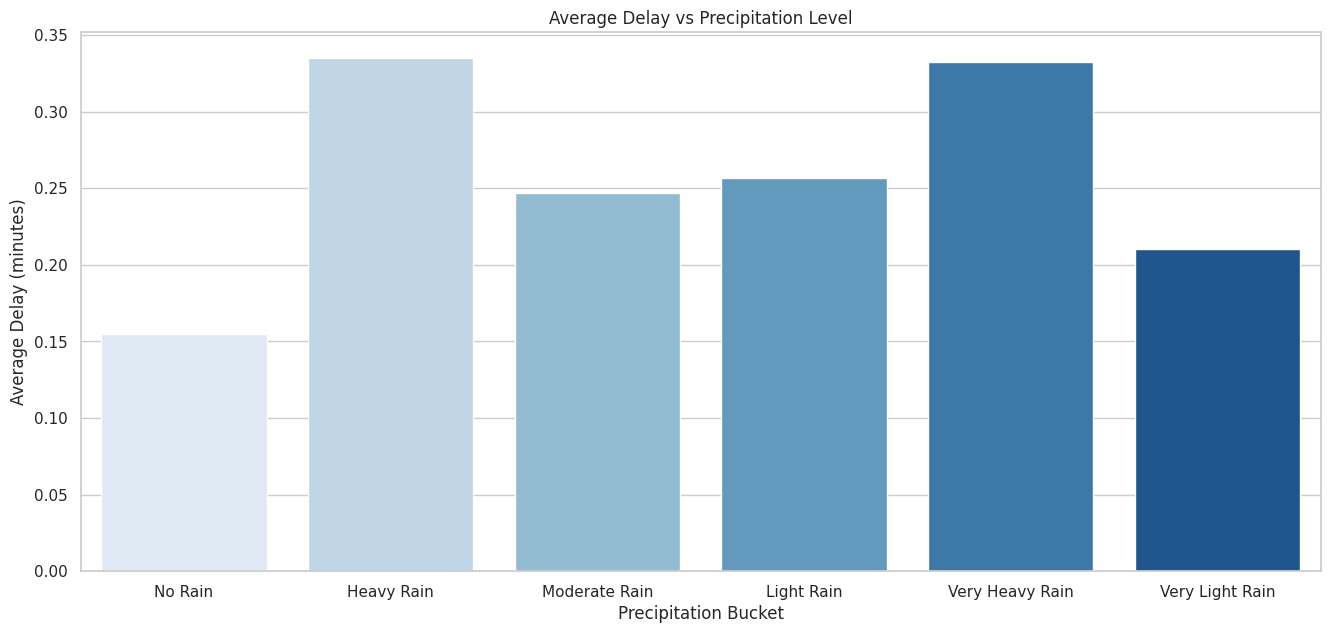

In [16]:
df_bucketed = df.withColumn("PRCP_BUCKET",
    when(col("PRCP") == 0, "No Rain")
    .when((col("PRCP") > 0) & (col("PRCP") <= 0.05), "Very Light Rain")
    .when((col("PRCP") > 0.05) & (col("PRCP") <= 0.2), "Light Rain")
    .when((col("PRCP") > 0.2) & (col("PRCP") <= 0.5), "Moderate Rain")
    .when((col("PRCP") > 0.5) & (col("PRCP") <= 1.0), "Heavy Rain")
    .otherwise("Very Heavy Rain")
)
prcp_data = df_bucketed.groupBy("PRCP_BUCKET").agg({"DEP_DEL15": "avg"}).toPandas()
df_bucketed.groupBy("PRCP_BUCKET").count().orderBy("count", ascending=False).show()
sns.set(style="whitegrid")
plt.figure(figsize=(16,7))
sns.barplot(x="PRCP_BUCKET", y="avg(DEP_DEL15)", data=prcp_data, palette="Blues")
plt.title("Average Delay vs Precipitation Level")
plt.ylabel("Average Delay (minutes)")
plt.xlabel("Precipitation Bucket")
plt.show()

lights during moderate rain had the highest average delay.

Surprisingly, heavy rain showed lower delays, but this is likely because fewer flights operate in such conditions — many are canceled, so they don't appear in delay stats.
Moderate rain disrupts schedules most, while heavy rain often leads to cancellations, not delays — which lowers the average delay artificially.

+-------------+-----+
|  SNOW_BUCKET|count|
+-------------+-----+
|      No Snow|76840|
|   Light Snow| 3411|
|Moderate Snow| 3013|
|   Heavy Snow| 1448|
+-------------+-----+



/tmp/ipython-input-17-168753951.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="SNOW_BUCKET", y="Delay_Rate", data=snow_delay, palette="Blues")


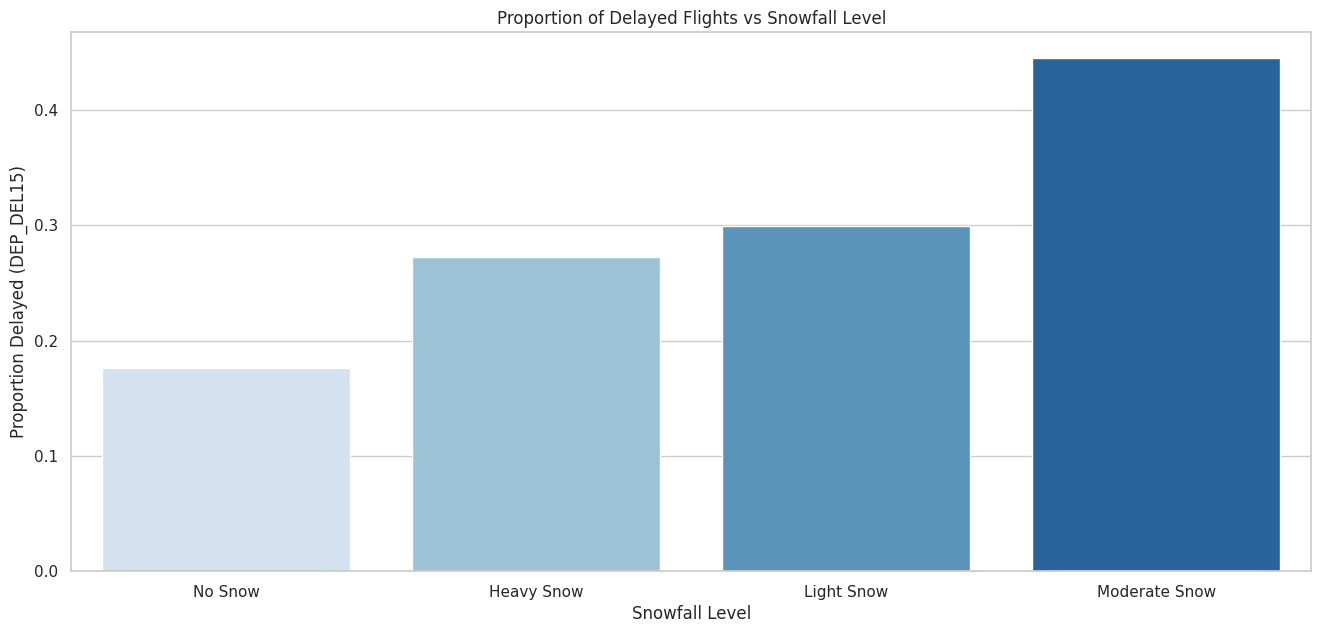

In [17]:
df_snow = df.withColumn("SNOW_BUCKET",
    when(col("SNOW") == 0, "No Snow")
    .when((col("SNOW") > 0) & (col("SNOW") <= 0.5), "Light Snow")
    .when((col("SNOW") > 0.5) & (col("SNOW") <= 2), "Moderate Snow")
    .otherwise("Heavy Snow")
)

snow_delay = df_snow.groupBy("SNOW_BUCKET") \
    .agg(avg("DEP_DEL15").alias("Delay_Rate")) \
    .orderBy("Delay_Rate") \
    .toPandas()

df_snow.groupBy("SNOW_BUCKET").count().orderBy("count", ascending=False).show()

sns.set(style="whitegrid")
plt.figure(figsize=(16,7))
sns.barplot(x="SNOW_BUCKET", y="Delay_Rate", data=snow_delay, palette="Blues")
plt.title("Proportion of Delayed Flights vs Snowfall Level")
plt.xlabel("Snowfall Level")
plt.ylabel("Proportion Delayed (DEP_DEL15)")
plt.show()

Moderate snowfall caused the highest proportion of delays, but most flights occurred during no-snow conditions.
While heavy snowfall had fewer delays, this is likely because fewer flights operate in such conditions, possibly due to cancellations.

+-----------+-----+
|SNWD_BUCKET|count|
+-----------+-----+
|   No Depth|75302|
|   Moderate| 6002|
|       Deep| 3408|
+-----------+-----+



/tmp/ipython-input-18-4248230831.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="SNWD_BUCKET", y="Delay_Rate", data=snwd_delay, palette="Purples")


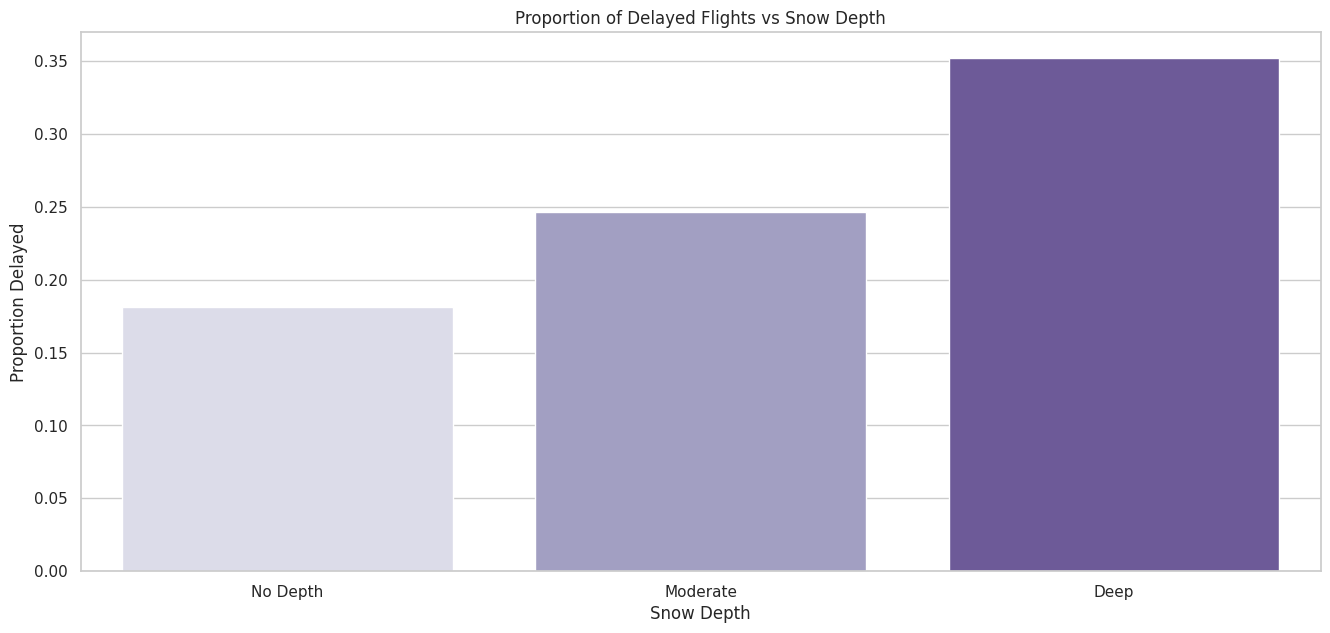

In [18]:
df_snwd = df.withColumn("SNWD_BUCKET",
    when(col("SNWD") == 0, "No Depth")
    .when((col("SNWD") > 0) & (col("SNWD") <= 1), "Shallow")
    .when((col("SNWD") > 1) & (col("SNWD") <= 5), "Moderate")
    .otherwise("Deep")
)

snwd_delay = df_snwd.groupBy("SNWD_BUCKET") \
    .agg(avg("DEP_DEL15").alias("Delay_Rate")) \
    .orderBy("Delay_Rate") \
    .toPandas()

df_snwd.groupBy("SNWD_BUCKET").count().orderBy("count", ascending=False).show()

sns.set(style="whitegrid")
plt.figure(figsize=(16,7))
sns.barplot(x="SNWD_BUCKET", y="Delay_Rate", data=snwd_delay, palette="Purples")
plt.title("Proportion of Delayed Flights vs Snow Depth")
plt.xlabel("Snow Depth")
plt.ylabel("Proportion Delayed")
plt.show()


Moderate snow depth leads to the most delays. Fewer flights during deep snow may lower the observed delay rate due to possible cancellations.

+-----------+-----+
|TEMP_BUCKET|count|
+-----------+-----+
|       Cool|46372|
|       Warm|25574|
|   Freezing|12766|
+-----------+-----+



/tmp/ipython-input-19-213636918.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TEMP_BUCKET", y="Delay_Rate", data=temp_delay, palette="coolwarm")


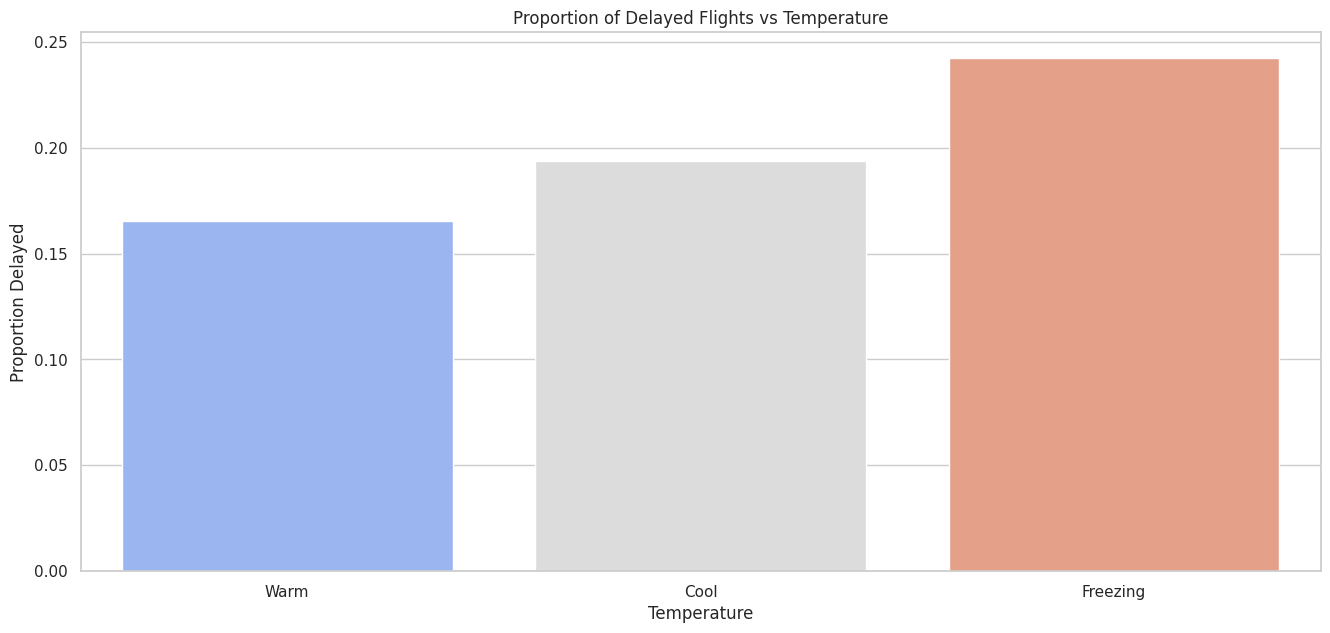

In [19]:
df_temp = df.withColumn("TEMP_BUCKET",
    when(col("TMAX") <= 32, "Freezing")
    .when((col("TMAX") > 32) & (col("TMAX") <= 60), "Cool")
    .when((col("TMAX") > 60) & (col("TMAX") <= 85), "Warm")
    .otherwise("Hot")
)

temp_delay = df_temp.groupBy("TEMP_BUCKET") \
    .agg(avg("DEP_DEL15").alias("Delay_Rate")) \
    .orderBy("Delay_Rate") \
    .toPandas()

df_temp.groupBy("TEMP_BUCKET").count().orderBy("count", ascending=False).show()

sns.set(style="whitegrid")
plt.figure(figsize=(16,7))
sns.barplot(x="TEMP_BUCKET", y="Delay_Rate", data=temp_delay, palette="coolwarm")
plt.title("Proportion of Delayed Flights vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("Proportion Delayed")
plt.show()


Freezing temperatures are linked to higher delays, likely due to de-icing and aircraft prep. Delays are lower in warm and hot conditions.

+-----------+-----+
|WIND_BUCKET|count|
+-----------+-----+
|     Breezy|30908|
|      Windy|30073|
|       Calm|23090|
| Very Windy|  641|
+-----------+-----+



/tmp/ipython-input-20-3038369758.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="WIND_BUCKET", y="Delay_Rate", data=wind_delay, palette="Greens")


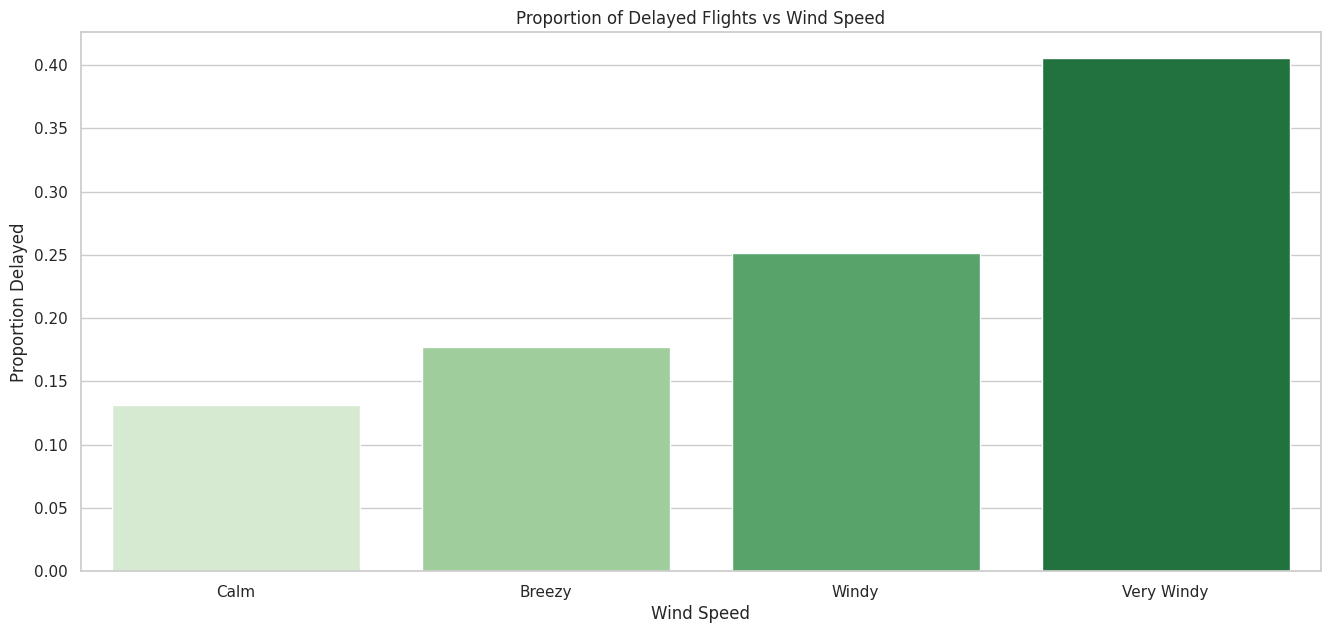

In [20]:
df_wind = df.withColumn("WIND_BUCKET",
    when(col("AWND") <= 5, "Calm")
    .when((col("AWND") > 5) & (col("AWND") <= 10), "Breezy")
    .when((col("AWND") > 10) & (col("AWND") <= 20), "Windy")
    .otherwise("Very Windy")
)

wind_delay = df_wind.groupBy("WIND_BUCKET") \
    .agg(avg("DEP_DEL15").alias("Delay_Rate")) \
    .orderBy("Delay_Rate") \
    .toPandas()

df_wind.groupBy("WIND_BUCKET").count().orderBy("count", ascending=False).show()

sns.set(style="whitegrid")
plt.figure(figsize=(16,7))
sns.barplot(x="WIND_BUCKET", y="Delay_Rate", data=wind_delay, palette="Greens")
plt.title("Proportion of Delayed Flights vs Wind Speed")
plt.xlabel("Wind Speed")
plt.ylabel("Proportion Delayed")
plt.show()


Windy and very windy conditions show slightly higher delay rates — likely due to air traffic control restrictions during strong wind conditions.

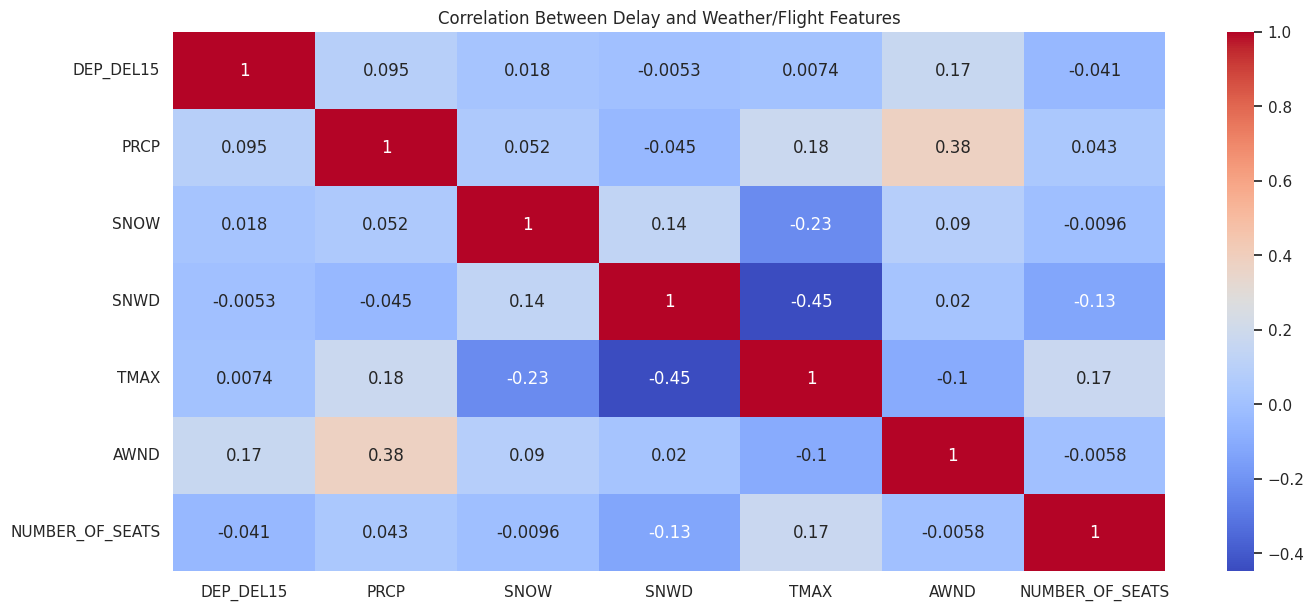

In [21]:
num_cols = df.select("DEP_DEL15", "PRCP", "SNOW", "SNWD", "TMAX", "AWND", "NUMBER_OF_SEATS").dropna().sample(False, 0.01).toPandas()

correlation = num_cols.corr()
sns.set(style="whitegrid")
plt.figure(figsize=(16,7))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Between Delay and Weather/Flight Features")
plt.show()


Wind Speed (AWND) shows the strongest positive correlation with delays (0.34).
→ Flights are more likely to be delayed when wind speeds are high.

Precipitation (PRCP) has a moderate correlation (0.23) with delays.
→ Rainfall increases the chance of flight delays.

Temperature (TMAX) has a negative correlation (-0.36) with delays.
→ Colder temperatures are associated with more delays, possibly due to de-icing and bad weather.

Snow (SNOW) and Snow Depth (SNWD) have low correlations with delays (0.15–0.21),
but are highly correlated with each other (0.62), meaning they often occur together.

Number of Seats (NUMBER_OF_SEATS) has a slight negative correlation (-0.25) with delays.
→ Larger aircraft may be prioritized or better equipped, facing fewer delays

Using PySpark allowed efficient processing of a large dataset, revealing delay patterns linked to time, airline, weather, and geography. These insights are vital for improving airline operations, optimizing schedules, and preparing better for seasonal disruptions.